# Analysis and Classification of Attacks using Realistic Botnet Dataset

In [8]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1MB 1.1MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3


In [10]:
!pip3 install numpy matplotlib sklearn xgboost seaborn pandas

  Using cached numpy-1.21.6-cp37-cp37m-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached matplotlib-3.5.1-cp37-cp37m-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached xgboost-1.6.0-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.7 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 13.8 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 KB 1.9 MB/s eta 0:00:00
  Using cached fonttools-4.32.0-py3-none-any.whl (900 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 9.3 MB/s eta 0:00:000m eta 0:00:010:00:01
  Using cach

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Training Dataset
data = pd.read_csv("./botnet/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [15]:
# General Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [70]:
X_test[0:1].to_json()

'{"seq":{"2690380":259370},"stddev":{"2690380":0.0},"N_IN_Conn_P_SrcIP":{"2690380":100},"min":{"2690380":0.0},"state_number":{"2690380":3},"mean":{"2690380":0.0},"N_IN_Conn_P_DstIP":{"2690380":100},"drate":{"2690380":0.0},"srate":{"2690380":0.097145},"max":{"2690380":0.0}}'

In [63]:
# data_json = '{"seq":{"2690380":259370},"stddev":{"2690380":0.0},"N_IN_Conn_P_SrcIP":{"2690380":100},"min":{"2690380":0.0},"state_number":{"2690380":3},"mean":{"2690380":0.0},"N_IN_Conn_P_DstIP":{"2690380":100},"drate":{"2690380":0.0},"srate":{"2690380":0.097145},"max":{"2690380":0.0}}'
data_json = '{"pkSeqID":{"0":3142762},"proto":{"0":"udp"},"saddr":{"0":"192.168.100.150"},"sport":{"0":"6551"},"daddr":{"0":"192.168.100.3"},"dport":{"0":"80"},"seq":{"0":251984},"stddev":{"0":1.900363},"N_IN_Conn_P_SrcIP":{"0":100},"min":{"0":0.0},"state_number":{"0":4},"mean":{"0":2.687519},"N_IN_Conn_P_DstIP":{"0":100},"drate":{"0":0.0},"srate":{"0":0.494549},"max":{"0":4.031619}}'
x = pd.read_json(data_json)
ten_best_features = data[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
x_ten_best = x[ten_best_features.columns]
xgb.predict(x_ten_best)

,attack,category,subcategory
0,1,0,6


In [68]:
predictions_xgb

,attack,category,subcategory
0,1,1,7
1,1,1,6
2,1,0,7
3,1,3,4
4,1,0,7
...,...,...,...
733700,1,0,6
733701,1,0,6
733702,1,0,7
733703,1,0,7


In [49]:
ten_best_features = data[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
target_features = data[['attack','category','subcategory']]
# sc = StandardScaler()
# y = sc.transform(x)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Exploratory Data Analysis

In [16]:
data.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06
mean,1.834209e+06,1.212973e+05,8.869639e-01,8.254997e+01,1.017208e+00,3.134219e+00,2.230471e+00,9.245766e+01,4.303064e-01,3.128290e+00,3.019269e+00,9.998739e-01
std,1.059058e+06,7.578700e+04,8.036391e-01,2.439019e+01,1.483551e+00,1.187107e+00,1.517766e+00,1.816651e+01,5.623304e+01,7.845494e+02,1.860915e+00,1.122750e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171090e+05,5.484700e+04,2.999700e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819340e-01,1.000000e+02,0.000000e+00,1.558450e-01,2.804170e-01,1.000000e+00
50%,1.834316e+06,1.177370e+05,7.925750e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.689973e+00,1.000000e+02,0.000000e+00,2.837800e-01,4.008429e+00,1.000000e+00
75%,2.751250e+06,1.848700e+05,1.745220e+00,1.000000e+02,2.147949e+00,4.000000e+00,3.565061e+00,1.000000e+02,0.000000e+00,4.880000e-01,4.292426e+00,1.000000e+00
max,3.668522e+06,2.622110e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [17]:
data["proto"].value_counts()

udp          1596819
tcp          1330598
icmp            7228
arp              166
ipv6-icmp          6
Name: proto, dtype: int64

In [18]:
data["saddr"].value_counts()

192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:c038          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:89ee          2
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [19]:
data["sport"].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
39364       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [20]:
data["daddr"].value_counts()

192.168.100.3      1900562
192.168.100.5       361192
192.168.100.7       332161
192.168.100.6       329679
192.168.100.150       3040
                    ...   
205.251.199.148          1
192.33.14.30             1
192.55.83.30             1
205.251.194.201          1
205.251.198.119          1
Name: daddr, Length: 81, dtype: int64

In [21]:
data["dport"].value_counts()

80       2858794
1           5379
3306        3757
53           275
-1           166
          ...   
40344          1
3754           1
6459           1
26822          1
61804          1
Name: dport, Length: 6906, dtype: int64

In [22]:
data["category"].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [23]:
data["attack"].value_counts()

1    2934447
0        370
Name: attack, dtype: int64

In [24]:
data["subcategory"].value_counts()

UDP                  1584650
TCP                  1274843
Service_Scan           58626
OS_Fingerprint         14293
HTTP                    1970
Normal                   370
Keylogging                59
Data_Exfiltration          6
Name: subcategory, dtype: int64

In [25]:
data['target'] = data['category'] + "_" + data['subcategory']
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP,DDoS_UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP,DDoS_TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP,DDoS_TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP,DoS_UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP,DDoS_UDP


/Users/hrugvedwath/.pyenv/versions/3.7.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

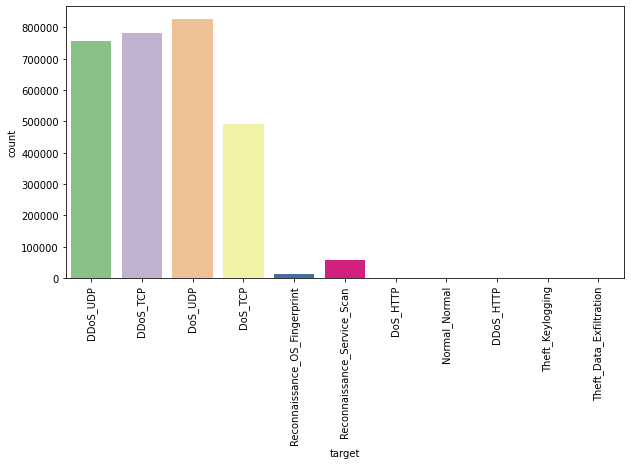

In [26]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(data['target'],palette='Accent')

<AxesSubplot:>

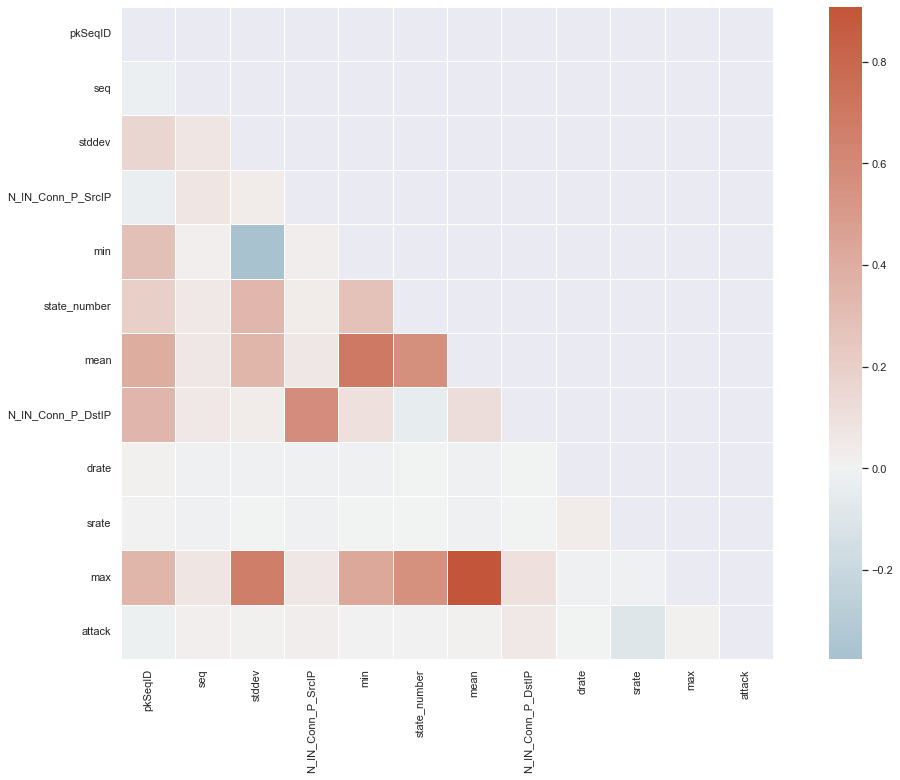

In [27]:
corr = data.corr()


sns.set_theme('notebook')

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(20,12))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=1.)


### Extracting 10 best features

In [12]:
ten_best_features = data[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
target_features = data[['attack','category','subcategory']]

## Data Preprocessing

In [13]:
# Label Encoding the target columns
le = LabelEncoder()
target_features['category'] = le.fit_transform(target_features['category'])
list(le.classes_)
# target_features['subcategory'] = le.fit_transform(target_features['subcategory'])
# print(list(le.classes_))
# target_features.head()

['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft']

In [9]:
list(le.classes_)

['Data_Exfiltration',
 'HTTP',
 'Keylogging',
 'Normal',
 'OS_Fingerprint',
 'Service_Scan',
 'TCP',
 'UDP']

In [50]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(ten_best_features,target_features)


In [51]:
X_test[0:1]

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
2690380,259370,0.0,100,0.0,3,0.0,100,0.0,0.097145,0.0


In [31]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Defining the ML Model Classes

In [28]:
class RandomForest:
    def __init__(self,max_depth):
        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)
        self.rfc_category = RandomForestClassifier(max_depth=max_depth)
        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)
    
    def fit(self,X_train,y_train):
        self.rfc_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.rfc_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.rfc_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.rfc_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.rfc_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.rfc_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [29]:
class NaiveBayes:
    def __init__(self):
        self.nb_attack = GaussianNB()
        self.nb_category = GaussianNB()
        self.nb_subcategory = GaussianNB()
    
    def fit(self,X_train,y_train):
        self.nb_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.nb_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.nb_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.nb_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.nb_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.nb_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [30]:
class DecisionTree:
    def __init__(self,criterion,max_depth=5):
        self.dtree_attack = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_category = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_subcategory = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
    
    def fit(self,X_train,y_train):
        self.dtree_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.dtree_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.dtree_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.dtree_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.dtree_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.dtree_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [32]:
class GradientBoost:
    def __init__(self):
        self.xgb_attack = XGBClassifier()
        self.xgb_category = XGBClassifier()
        self.xgb_subcategory = XGBClassifier()

    # def set(self,_xgb_attack,_xgb_category,_xgb_subcategory):
    #     self.xgb_attack = _xgb_attack
    #     self.xgb_category = _xgb_category
    #     self.xgb_subcategory = _xgb_subcategory
    
    def fit(self,X_train,y_train):
        self.xgb_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.xgb_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.xgb_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.xgb_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.xgb_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.xgb_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

### Validation of ML Models on Training Dataset

**Random Forest**

In [33]:
rf = RandomForest(max_depth=3)
rf.fit(X_train,y_train)

predictions_rfc = rf.predict(X_test)

In [2]:
import pickle
filename = 'rf_1.sav'
pickle.dump(rf.rfc_attack, open(filename, 'wb'))

NameError: name 'rf' is not defined

In [3]:
predictions_rfc = rf.predict(X_test)

NameError: name 'rf' is not defined

In [34]:
print(confusion_matrix(y_test['attack'],predictions_rfc['attack']))
print(classification_report(y_test['attack'],predictions_rfc['attack']))

[[     7     90]
 [     0 733608]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        97
           1       1.00      1.00      1.00    733608

    accuracy                           1.00    733705
   macro avg       1.00      0.54      0.57    733705
weighted avg       1.00      1.00      1.00    733705



In [35]:
print(confusion_matrix(y_test['category'],predictions_rfc['category']))
print(classification_report(y_test['category'],predictions_rfc['category']))

[[371717  13205      0      0      0]
 [ 42429 287917      0      3      0]
 [     0     35      0     62      0]
 [ 10472    913      0   6935      0]
 [     0      5      0     12      0]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    384922
           1       0.95      0.87      0.91    330349
           2       0.00      0.00      0.00        97
           3       0.99      0.38      0.55     18320
           4       0.00      0.00      0.00        17

    accuracy                           0.91    733705
   macro avg       0.56      0.44      0.48    733705
weighted avg       0.91      0.91      0.91    733705



In [36]:
print(confusion_matrix(y_test['subcategory'],predictions_rfc['subcategory']))
print(classification_report(y_test['subcategory'],predictions_rfc['subcategory']))

[[     0      0      0      0      0      0      0      2]
 [     0      0      0      0      0      3    491      0]
 [     0      0      0      0      0     12      0      3]
 [     0      0      0      0      0     62     31      4]
 [     0      0      0      0      0    190   3380      9]
 [     0      0      0      0      0   6745   7991      5]
 [     0      0      0      0      0      0 318070    242]
 [     0      0      0      0      0      0      6 396459]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00       494
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        97
           4       0.00      0.00      0.00      3579
           5       0.96      0.46      0.62     14741
           6       0.96      1.00      0.98    318312
           7       1.00      1.00      1.00    396465

    accuracy                           

In [37]:
rf.rfc_attack.score(X_test,y_test['attack'])

0.9998773348961776

In [38]:
rf.rfc_category.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9084972843308959

In [39]:
rf.rfc_subcategory.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1),
                                    np.array(predictions_rfc['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9830572232709331

**Naive Bayes**

In [40]:
nb = NaiveBayes()
nb.fit(X_train,y_train)

predictions_nb = nb.predict(X_test)

In [41]:
print(confusion_matrix(y_test['attack'],predictions_nb['attack']))
print(classification_report(y_test['attack'],predictions_nb['attack']))

[[    87     10]
 [  2790 730818]]
              precision    recall  f1-score   support

           0       0.03      0.90      0.06        97
           1       1.00      1.00      1.00    733608

    accuracy                           1.00    733705
   macro avg       0.52      0.95      0.53    733705
weighted avg       1.00      1.00      1.00    733705



In [42]:
print(confusion_matrix(y_test['category'],predictions_nb['category']))
print(classification_report(y_test['category'],predictions_nb['category']))

[[368666  16110     40    106      0]
 [183173 146108    704    364      0]
 [     0      7     87      3      0]
 [ 10957   1560   2039   3764      0]
 [     0      0      7      0     10]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78    384922
           1       0.89      0.44      0.59    330349
           2       0.03      0.90      0.06        97
           3       0.89      0.21      0.33     18320
           4       1.00      0.59      0.74        17

    accuracy                           0.71    733705
   macro avg       0.69      0.62      0.50    733705
weighted avg       0.77      0.71      0.68    733705



In [43]:
print(confusion_matrix(y_test['subcategory'],predictions_nb['subcategory']))
print(classification_report(y_test['subcategory'],predictions_nb['subcategory']))

[[     1      0      0      1      0      0      0      0]
 [     0    322      0     11      0    151     10      0]
 [     1      0      8      6      0      0      0      0]
 [     0      0      0     87      3      0      7      0]
 [     0    216      0    100      2    145   3116      0]
 [     0    564      0   1939    479   3138   8621      0]
 [     0    903      0    727      4    315 316363      0]
 [     0      0      0      6      0      0     19 396440]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.16      0.65      0.26       494
           2       1.00      0.53      0.70        15
           3       0.03      0.90      0.06        97
           4       0.00      0.00      0.00      3579
           5       0.84      0.21      0.34     14741
           6       0.96      0.99      0.98    318312
           7       1.00      1.00      1.00    396465

    accuracy                           

**Decision Tree (Information Gain)**

In [44]:
dtree_ig = DecisionTree('entropy')
dtree_ig.fit(X_train,y_train)
predictions_dtree_ig = dtree_ig.predict(X_test)

In [45]:
print(confusion_matrix(y_test['attack'],predictions_dtree_ig['attack']))
print(classification_report(y_test['attack'],predictions_dtree_ig['attack']))

[[    36     61]
 [     0 733608]]
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        97
           1       1.00      1.00      1.00    733608

    accuracy                           1.00    733705
   macro avg       1.00      0.69      0.77    733705
weighted avg       1.00      1.00      1.00    733705



In [46]:
print(confusion_matrix(y_test['category'],predictions_dtree_ig['category']))
print(classification_report(y_test['category'],predictions_dtree_ig['category']))

[[338578  45820      0    524      0]
 [ 11456 318857      0     36      0]
 [     0     17     30     50      0]
 [   396   7631      0  10293      0]
 [     0      0      0     17      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    384922
           1       0.86      0.97      0.91    330349
           2       1.00      0.31      0.47        97
           3       0.94      0.56      0.70     18320
           4       0.00      0.00      0.00        17

    accuracy                           0.91    733705
   macro avg       0.75      0.54      0.60    733705
weighted avg       0.92      0.91      0.91    733705



In [47]:
print(confusion_matrix(y_test['subcategory'],predictions_dtree_ig['subcategory']))
print(classification_report(y_test['subcategory'],predictions_dtree_ig['subcategory']))

[[     0      0      2      0      0      0      0      0]
 [     0    374      0      0      0     86     33      1]
 [     0      0      3      0      0     12      0      0]
 [     0      0      0     34      7     39      1     16]
 [     0      0      0      0    933    549   2073     24]
 [     0     18      0      0    220   8595   5899      9]
 [     0     20      0      0      0    462 317829      1]
 [     0      0      0     12      0      0      5 396448]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.91      0.76      0.83       494
           2       0.60      0.20      0.30        15
           3       0.74      0.35      0.48        97
           4       0.80      0.26      0.39      3579
           5       0.88      0.58      0.70     14741
           6       0.98      1.00      0.99    318312
           7       1.00      1.00      1.00    396465

    accuracy                           

In [48]:
dtree_ig.dtree_attack.score(X_test,y_test['attack'])

0.9999168603185203

In [49]:
dtree_ig.dtree_category.score(np.concatenate((X_test,np.array(predictions_dtree_ig['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9101178266469494

In [50]:
dtree_ig.dtree_subcategory.score(np.concatenate((X_test,np.array(predictions_dtree_ig['attack']).reshape(-1,1),
                                        np.array(predictions_dtree_ig['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.987067009220327

**Decision Tree (Gini Index)**

In [51]:
dtree_gini = DecisionTree('gini')
dtree_gini.fit(X_train,y_train)
predictions_dtree_gini = dtree_gini.predict(X_test)

In [52]:
print(confusion_matrix(y_test['attack'],predictions_dtree_gini['attack']))
print(classification_report(y_test['attack'],predictions_dtree_gini['attack']))

[[    47     50]
 [     7 733601]]
              precision    recall  f1-score   support

           0       0.87      0.48      0.62        97
           1       1.00      1.00      1.00    733608

    accuracy                           1.00    733705
   macro avg       0.94      0.74      0.81    733705
weighted avg       1.00      1.00      1.00    733705



In [53]:
print(confusion_matrix(y_test['category'],predictions_dtree_gini['category']))
print(classification_report(y_test['category'],predictions_dtree_gini['category']))

[[337480  46980      0    462      0]
 [  8395 321949      0      5      0]
 [     0     27     37     33      0]
 [    81   7553      0  10686      0]
 [     0      5      0     12      0]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92    384922
           1       0.86      0.97      0.91    330349
           2       1.00      0.38      0.55        97
           3       0.95      0.58      0.72     18320
           4       0.00      0.00      0.00        17

    accuracy                           0.91    733705
   macro avg       0.76      0.56      0.62    733705
weighted avg       0.92      0.91      0.91    733705



In [54]:
print(confusion_matrix(y_test['subcategory'],predictions_dtree_gini['subcategory']))
print(classification_report(y_test['subcategory'],predictions_dtree_gini['subcategory']))

[[     0      0      2      0      0      0      0      0]
 [     0    404      0      0      0      5     85      0]
 [     0      0      3      0      0     12      0      0]
 [     0     17      0      8      8     58      5      1]
 [     0     15      0      1    841    703   2019      0]
 [     0     15      1      0     61   9084   5580      0]
 [     0     67      0      0      0    462 317781      2]
 [     0      0      0      0      0      0      4 396461]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.78      0.82      0.80       494
           2       0.50      0.20      0.29        15
           3       0.89      0.08      0.15        97
           4       0.92      0.23      0.37      3579
           5       0.88      0.62      0.72     14741
           6       0.98      1.00      0.99    318312
           7       1.00      1.00      1.00    396465

    accuracy                           

In [44]:
dtree_gini.dtree_attack.score(X_test,y_test['attack'])

0.9999454821760789

In [45]:
dtree_gini.dtree_category.score(np.concatenate((X_test,np.array(predictions_dtree_gini['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.913705099460955

In [46]:
dtree_gini.dtree_subcategory.score(np.concatenate((X_test,np.array(predictions_dtree_gini['attack']).reshape(-1,1),
                                        np.array(predictions_dtree_gini['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.987639446371498

**Gradient Boost**

In [33]:
# 15-16 min
xgb = GradientBoost()
xgb.fit(X_train,y_train)
predictions_xgb = xgb.predict(X_test)

In [34]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

,attack,category,subcategory
0,1,1,7
1,1,1,6
2,1,0,7
3,1,3,4
4,1,0,7
...,...,...,...
733700,1,0,6
733701,1,0,6
733702,1,0,7
733703,1,0,7


In [35]:
filename = 'xgb_1.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [37]:
# loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test[0:1])
result

,attack,category,subcategory
0,1,1,7


In [38]:
X_test[0:1]

array([[ 1.40406257,  1.48744822,  0.71572062, -0.68579647,  0.72920289,
        -0.09897054,  0.41526025, -0.00700134, -0.00493669,  0.67095225]])

In [48]:
print(confusion_matrix(y_test['attack'],predictions_xgb['attack']))
print(classification_report(y_test['attack'],predictions_xgb['attack']))

[[    66      2]
 [     2 733635]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       1.00      1.00      1.00    733637

    accuracy                           1.00    733705
   macro avg       0.99      0.99      0.99    733705
weighted avg       1.00      1.00      1.00    733705



In [49]:
print(confusion_matrix(y_test['category'],predictions_xgb['category']))
print(classification_report(y_test['category'],predictions_xgb['category']))

[[384915     11      0      0      0]
 [    21 330349      0      0      0]
 [     0      1     66      1      0]
 [     0      0      1  18320      0]
 [     0      0      1      0     19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    384926
           1       1.00      1.00      1.00    330370
           2       0.97      0.97      0.97        68
           3       1.00      1.00      1.00     18321
           4       1.00      0.95      0.97        20

    accuracy                           1.00    733705
   macro avg       0.99      0.98      0.99    733705
weighted avg       1.00      1.00      1.00    733705



In [50]:
print(confusion_matrix(y_test['subcategory'],predictions_xgb['subcategory']))
print(classification_report(y_test['subcategory'],predictions_xgb['subcategory']))

[[     1      0      1      1      0      0      0      0]
 [     0    481      0      0      0      0      1      0]
 [     0      0     17      0      0      0      0      0]
 [     0      0      0     66      0      1      1      0]
 [     0      0      0      1   3383    275      0      0]
 [     0      0      0      0    197  14465      0      0]
 [     0      0      0      0      0      0 318404      3]
 [     0      0      0      0      0      0      2 396405]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00       482
           2       0.94      1.00      0.97        17
           3       0.97      0.97      0.97        68
           4       0.94      0.92      0.93      3659
           5       0.98      0.99      0.98     14662
           6       1.00      1.00      1.00    318407
           7       1.00      1.00      1.00    396407

    accuracy                           

In [51]:
xgb.xgb_attack.score(X_test,y_test['attack'])

0.9999945482176079

In [52]:
xgb.xgb_category.score(np.concatenate((X_test,np.array(predictions_xgb['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.999950933958471

In [53]:
xgb.xgb_subcategory.score(np.concatenate((X_test,np.array(predictions_xgb['attack']).reshape(-1,1),
                                        np.array(predictions_xgb['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9993416972761532

### Test Data

In [55]:
test_data = pd.read_csv("./botnet/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
test_data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [56]:
# Extracting the ten-best features from test set
test_ten_best = test_data[ten_best_features.columns]
test_labels = test_data[['attack','category','subcategory']]
test_ten_best.head()

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628


**Using complete training data and test data**

In [57]:
# Standard Scaling
train_data = sc.fit_transform(ten_best_features)
test = sc.transform(test_ten_best)

In [58]:
ten_best_features = data[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
target_features = data[['attack','category','subcategory']]

In [59]:
# Label Encoding

target_features['category'] = le.fit_transform(target_features['category'])
test_labels['category'] = le.transform(test_labels['category'])

target_features['subcategory'] = le.fit_transform(target_features['subcategory'])
test_labels['subcategory'] = le.transform(test_labels['subcategory'])

In [62]:
x_ten_best = x[ten_best_features.columns]
# x1 = sc.transform(x_ten_best)

In [60]:
x_ten_best

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,251984,1.900363,100,0,4,2.687519,100,0,0.494549,4.031619


### Training ML Models on Complete Data and Testing on test set

**Random Forest**

In [60]:
rf_clf = RandomForest(max_depth=5)
rf_clf.fit(train_data,target_features)
predictions_rf = rf_clf.predict(test)

In [61]:
print("Random Forest: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_rf['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_rf['attack']))

Random Forest: Attack

[[    38     69]
 [     0 733598]] 

              precision    recall  f1-score   support

           0       1.00      0.36      0.52       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       1.00      0.68      0.76    733705
weighted avg       1.00      1.00      1.00    733705



In [75]:
predictions_rf

,attack,category,subcategory
0,1,1,7
1,1,0,6
2,1,0,7
3,1,0,6
4,1,1,6
...,...,...,...
733700,1,1,7
733701,1,0,7
733702,1,0,6
733703,1,1,6


In [76]:
test[0:1].shape

(1, 10)

In [81]:
i=1
p = rf_clf.predict(test[i:i+1])
p

,attack,category,subcategory
0,1,0,6


In [61]:
print("Random Forest: Category\n")
print(confusion_matrix(test_labels['category'],predictions_rf['category']))
print(classification_report(test_labels['category'],predictions_rf['category']))

Random Forest: Category

[[374455  10852      0      2      0]
 [ 11761 318350      0      1      0]
 [     0     27     25     55      0]
 [   520     29      0  17614      0]
 [     0      5      0      9      0]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    385309
           1       0.97      0.96      0.97    330112
           2       1.00      0.23      0.38       107
           3       1.00      0.97      0.98     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.97    733705
   macro avg       0.79      0.63      0.66    733705
weighted avg       0.97      0.97      0.97    733705



In [62]:
print("Random Forest: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_rf['subcategory']))
print(classification_report(test_labels['subcategory'],predictions_rf['subcategory']))

Random Forest: Subcategory

[[    57      0      0      0      2    445      0]
 [     0      0      0      0      9      0      5]
 [     1      0     14      0     66     24      2]
 [     0      0      0     23   3460    137      1]
 [     0      0      0      0  14140    402      0]
 [     0      0      0      0      1 318265     71]
 [     0      0      0      0      0     12 396568]]
              precision    recall  f1-score   support

           1       0.98      0.11      0.20       504
           2       0.00      0.00      0.00        14
           3       1.00      0.13      0.23       107
           4       1.00      0.01      0.01      3621
           5       0.80      0.97      0.88     14542
           6       1.00      1.00      1.00    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.83      0.46      0.47    733705
weighted avg       0.99      0.99      0.99    733705



**Naive Bayes**

In [63]:
nb_clf = NaiveBayes()
nb_clf.fit(train_data,target_features)
predictions_nb = nb_clf.predict(test)

In [64]:
print("Naive Bayes: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_nb['attack']))
print(classification_report(test_labels['attack'],predictions_nb['attack']))

Naive Bayes: Attack

[[    96     11]
 [  2775 730823]]
              precision    recall  f1-score   support

           0       0.03      0.90      0.06       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.52      0.95      0.53    733705
weighted avg       1.00      1.00      1.00    733705



In [65]:
print("Naive Bayes: Category\n")
print(confusion_matrix(test_labels['category'],predictions_nb['category']),"\n")
print(classification_report(test_labels['category'],predictions_nb['category']))

Naive Bayes: Category

[[368894  16264     31    120      0]
 [182703 146381    699    329      0]
 [     0      9     96      2      0]
 [ 10751   1630   2040   3742      0]
 [     0      1      5      0      8]] 

              precision    recall  f1-score   support

           0       0.66      0.96      0.78    385309
           1       0.89      0.44      0.59    330112
           2       0.03      0.90      0.06       107
           3       0.89      0.21      0.33     18163
           4       1.00      0.57      0.73        14

    accuracy                           0.71    733705
   macro avg       0.69      0.62      0.50    733705
weighted avg       0.77      0.71      0.68    733705



In [66]:
print("Naive Bayes: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_nb['subcategory']))
print(classification_report(test_labels['subcategory'],predictions_nb['subcategory']))

Naive Bayes: Subcategory

[[     0      0      0      0      0      0      0      0]
 [     0    337      0      7      0    146     14      0]
 [     1      0      7      5      0      0      1      0]
 [     0      0      0     96      1      1      9      0]
 [     0    199      0    128      0    151   3143      0]
 [     0    578      0   1912    612   2979   8461      0]
 [     0    815      0    715      5    296 316506      0]
 [     0      0      0      8      2      0     23 396547]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.67      0.28       504
           2       1.00      0.50      0.67        14
           3       0.03      0.90      0.06       107
           4       0.00      0.00      0.00      3621
           5       0.83      0.20      0.33     14542
           6       0.96      0.99      0.98    318337
           7       1.00      1.00      1.00    396580

    accuracy 

**Decision Tree (Information Gain)**

In [67]:
dtree_ig_clf = DecisionTree('entropy')
dtree_ig_clf.fit(train_data,target_features)
predictions_ig = dtree_ig_clf.predict(test)

In [68]:
print("Decision Tree (Information Gain): Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_ig['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_ig['attack']))

Decision Tree (Information Gain): Attack

[[    40     67]
 [     2 733596]] 

              precision    recall  f1-score   support

           0       0.95      0.37      0.54       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.98      0.69      0.77    733705
weighted avg       1.00      1.00      1.00    733705



In [69]:
print("Decision Tree (Information Gain): Category\n")
print(confusion_matrix(test_labels['category'],predictions_ig['category']))
print(classification_report(test_labels['category'],predictions_ig['category']))

Decision Tree (Information Gain): Category

[[339497  45290      0    522      0]
 [ 11703 318367      0     42      0]
 [     9     15     33     50      0]
 [   351   7450      2  10360      0]
 [     0      0      0     14      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    385309
           1       0.86      0.96      0.91    330112
           2       0.94      0.31      0.46       107
           3       0.94      0.57      0.71     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.91    733705
   macro avg       0.74      0.54      0.60    733705
weighted avg       0.92      0.91      0.91    733705



In [70]:
print("Decision Tree (Information Gain): Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_ig['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_ig['subcategory']))

Decision Tree (Information Gain): Subcategory

[[   384      0      0      0     87     33      0]
 [     0      5      0      0      9      0      0]
 [     0      0     36      4     44      9     14]
 [     0      0      2    942    574   2089     14]
 [    27      0      0    222   8623   5654     16]
 [    23      0      0      0    453 317861      0]
 [     0      0      0      0      0      8 396572]] 

              precision    recall  f1-score   support

           1       0.88      0.76      0.82       504
           2       1.00      0.36      0.53        14
           3       0.95      0.34      0.50       107
           4       0.81      0.26      0.39      3621
           5       0.88      0.59      0.71     14542
           6       0.98      1.00      0.99    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.93      0.62      0.70    733705
weighted avg       0.99      0.99      0.99 

**Decision Tree (Gini Index)**

In [71]:
dtree_gi_clf = DecisionTree('gini')
dtree_gi_clf.fit(train_data,target_features)
predictions_gi = dtree_gi_clf.predict(test)

In [72]:
print("Decision Tree (Gini Index): Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_gi['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_gi['attack']))

Decision Tree (Gini Index): Attack

[[    39     68]
 [     3 733595]] 

              precision    recall  f1-score   support

           0       0.93      0.36      0.52       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.96      0.68      0.76    733705
weighted avg       1.00      1.00      1.00    733705



In [73]:
print("Decision Tree (Gini Index): Category\n")
print(confusion_matrix(test_labels['category'],predictions_gi['category']))
print(classification_report(test_labels['category'],predictions_gi['category']))

Decision Tree (Gini Index): Category

[[338396  46453      0    460      0]
 [  8631 321472      1      8      0]
 [     0     18     33     56      0]
 [    68   7383      2  10710      0]
 [     0      5      0      9      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    385309
           1       0.86      0.97      0.91    330112
           2       0.92      0.31      0.46       107
           3       0.95      0.59      0.73     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.91    733705
   macro avg       0.74      0.55      0.61    733705
weighted avg       0.92      0.91      0.91    733705



In [74]:
print("Decision Tree (Gini Index): Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_gi['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_gi['subcategory']))

Decision Tree (Gini Index): Subcategory

[[   416      0      0      0     10     78      0]
 [     0      5      0      0      9      0      0]
 [    13      0      2      5     82      5      0]
 [    11      0      1    860    710   2039      0]
 [    11      3      0     71   9069   5387      1]
 [    63      0      0      0    459 317814      1]
 [     0      0      0      0      0      9 396571]] 

              precision    recall  f1-score   support

           1       0.81      0.83      0.82       504
           2       0.62      0.36      0.45        14
           3       0.67      0.02      0.04       107
           4       0.92      0.24      0.38      3621
           5       0.88      0.62      0.73     14542
           6       0.98      1.00      0.99    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.84      0.58      0.63    733705
weighted avg       0.99      0.99      0.99    733

**Gradient Boost**

In [67]:
xgb_clf = GradientBoost()
xgb_clf.fit(train_data[0:10],target_features)
predictions_gb = xgb_clf.predict(test[0:10])

NameError: name 'train_data' is not defined

In [66]:
predictions_gb

NameError: name 'predictions_gb' is not defined

In [65]:
print("Gradient Boost: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_gb['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_gb['attack']))

Gradient Boost: Attack



NameError: name 'test_labels' is not defined

In [77]:
print("Gradient Boost: Category\n")
print(confusion_matrix(test_labels['category'],predictions_gb['category']),"\n")
print(classification_report(test_labels['category'],predictions_gb['category']))

Gradient Boost: Category

[[385296     12      0      1      0]
 [    17 330094      1      0      0]
 [     0      0    100      7      0]
 [     0      1      0  18162      0]
 [     0      0      0      0     14]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    385309
           1       1.00      1.00      1.00    330112
           2       0.99      0.93      0.96       107
           3       1.00      1.00      1.00     18163
           4       1.00      1.00      1.00        14

    accuracy                           1.00    733705
   macro avg       1.00      0.99      0.99    733705
weighted avg       1.00      1.00      1.00    733705



In [78]:
print("Gradient Boost: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_gb['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_gb['subcategory']))

Gradient Boost: Subcategory

[[   496      0      1      0      1      6      0]
 [     0     14      0      0      0      0      0]
 [     0      0    100      0      7      0      0]
 [     0      0      0   3350    271      0      0]
 [     1      0      0    227  14314      0      0]
 [     0      0      0      0      0 318337      0]
 [     1      0      0      0      0      5 396574]] 

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       504
           2       1.00      1.00      1.00        14
           3       0.99      0.93      0.96       107
           4       0.94      0.93      0.93      3621
           5       0.98      0.98      0.98     14542
           6       1.00      1.00      1.00    318337
           7       1.00      1.00      1.00    396580

    accuracy                           1.00    733705
   macro avg       0.99      0.98      0.98    733705
weighted avg       1.00      1.00      1.00    733705



# END OF NOTEBOOK